In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import itertools
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_excel("data/df_balanced_noDups.xlsx")
X = df.drop(columns=['target_class'])
y= df['target_class']

In [15]:
df.isna().sum()
df.columns

Index(['Unnamed: 0', ' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
mean_excess_kurtosis = df[' Excess kurtosis of the integrated profile'].mean()
mean_std_dnsnr = df[' Standard deviation of the DM-SNR curve'].mean()
mean_skewness = df[' Skewness of the integrated profile'].mean()

In [24]:
df[" Excess kurtosis of the integrated profile"].fillna(mean_excess_kurtosis,inplace=True)
df[' Standard deviation of the DM-SNR curve'].fillna(mean_std_dnsnr, inplace=True)
df[' Skewness of the DM-SNR curve'].fillna(mean_skewness, inplace=True)

In [25]:
df.isna().sum()

Unnamed: 0                                       0
 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [27]:
smote = SMOTE(sampling_strategy='minority')

In [29]:
X = df.drop(columns=['target_class'])
y= df['target_class']
x_sm, y_sm = smote.fit_resample(X, y)
df_smote = pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm)], axis=1)
df_smote.columns = df.columns

df_smote['target_class'].value_counts()

target_class
0    23262
1    23262
Name: count, dtype: int64

In [32]:
df_smote.drop_duplicates(inplace=True)
df_smote['target_class'].value_counts()

target_class
0    23262
1    23262
Name: count, dtype: int64

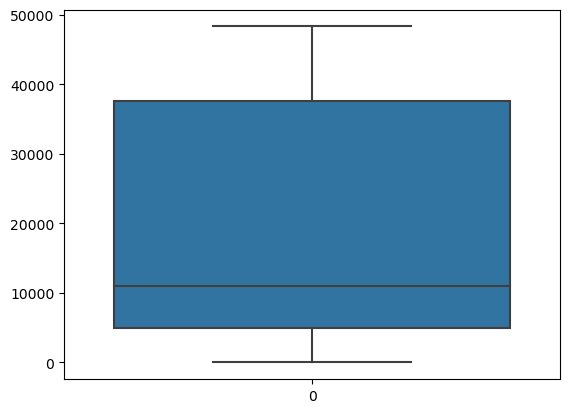

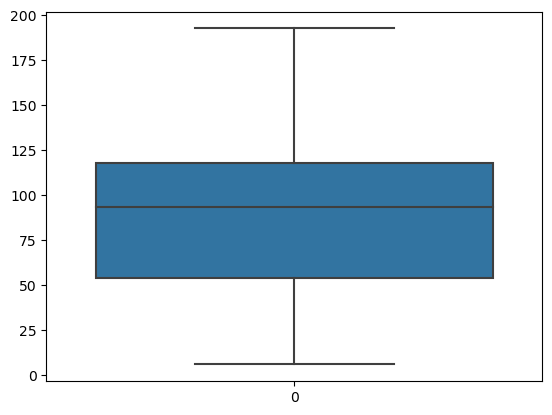

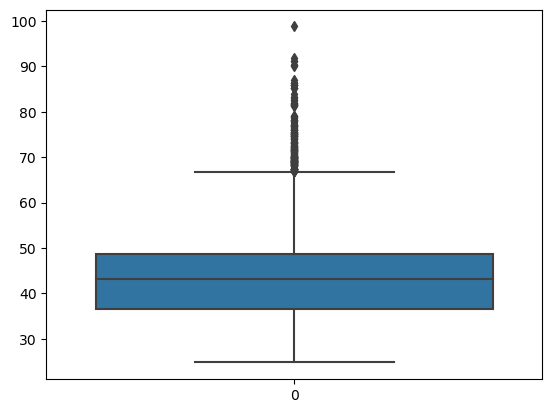

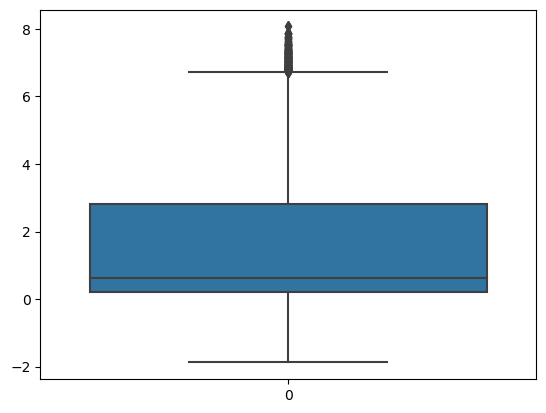

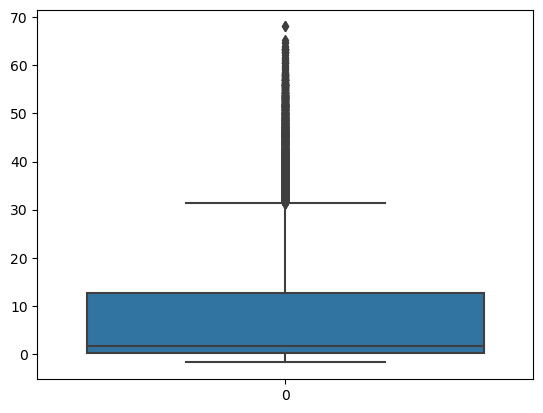

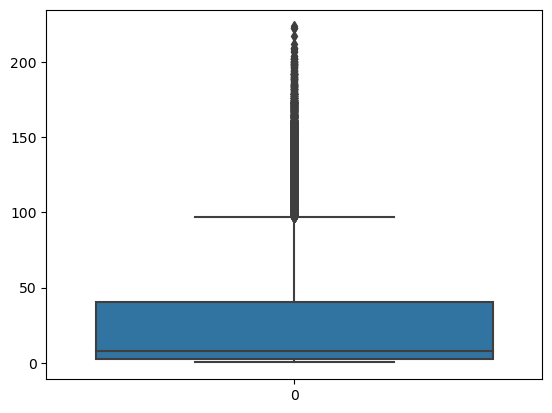

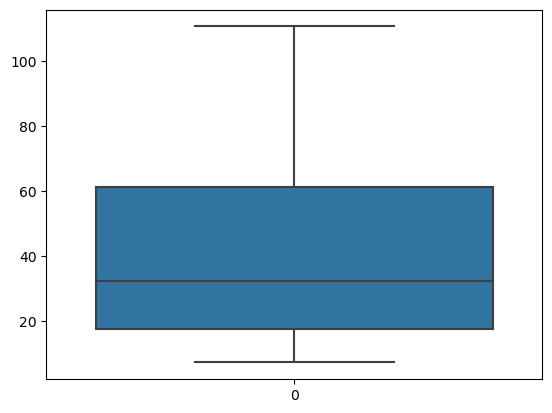

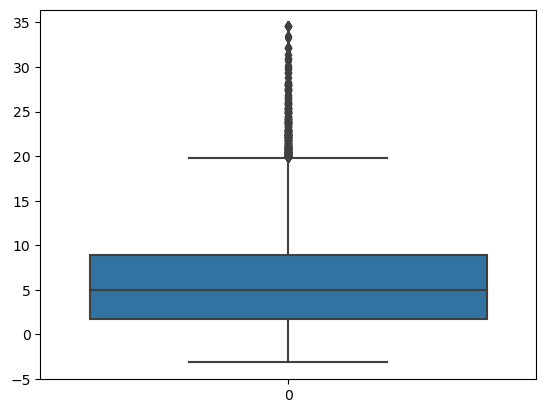

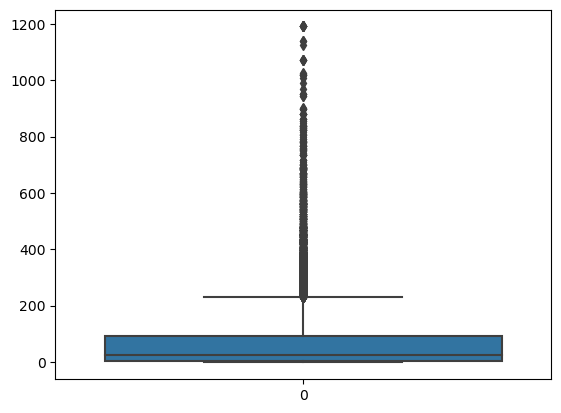

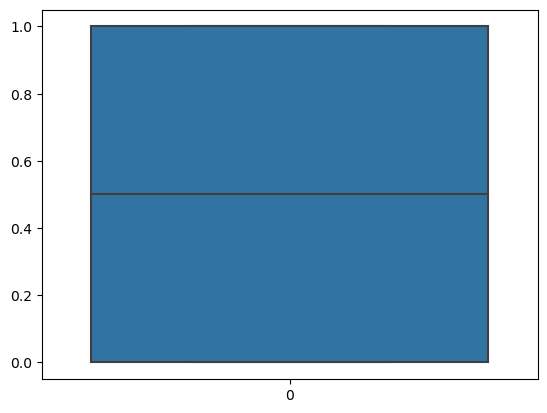

In [34]:
import seaborn as sns

numerical_columns = df_smote.select_dtypes(include=['float64', 'int64'])

for i in numerical_columns.columns:
    sns.boxplot(df_smote[i])
    plt.show()

In [36]:
outlier_count = 0
outlying_columns = []
for i in numerical_columns.columns:
    Q1 = df_smote[i].quantile(0.25)
    Q3 = df_smote[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = outlier_count + df_smote[(df_smote[i] < lower_bound) | (df_smote[i] > upper_bound)].shape[0]
    if outlier_count > 0:
        outlying_columns.append(i)
print(outlying_columns)
print(outlier_count)


[' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']
10743


(46524, 10)